In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataframe.csv', sep = ',')


In [3]:
pd.set_option('display.max_columns', 500)

# Data included 

The data was originally in the SQLite format downloaded from https://www.kaggle.com/hugomathien/soccer (European Soccer Database). <br>
Additional data was gathered from https://www.kaggle.com/jiezi2004/soccer (European Soccer Database Supplementary. <br>
We have chosen to look at only the Premier League (England) for this project. <br>
Data included for the project is:

In [4]:
df.columns.values

array(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_team_name',
       'away_team_name', 'home_y1', 'home_y2', 'home_r', 'away_y1',
       'away_y2', 'away_r', 'home_fouls', 'away_fouls', 'home_poss',
       'away_poss', 'home_shoton', 'away_shoton', 'home_shotoff',
       'away_shotoff', 'home_corners', 'away_corners', 'home_points',
       'away_points'], dtype=object)

id: Unique ID for match <br>
country_id: Denotes country (can be omitted after filtering for England) <br>
league_id: Which division the game is taking place in <br>
season: season, e.g. 2012/2013 <br>
stage: where the game is played <br>
date: date <br>
match_api_id: identifier related to the original data source <br>
home_team_api_id: unique indentifier for the home team <br>
away_team_api_id: unique identifier for the away team <br>
home_team_goal: number of goals scored by the home team <br>
away_team_goal: number of goals scored by the away team <br>
home_y1: number of first time offence yellow cards for the home team <br>
home_y2: number of second time offence yellow cards for the home team <br>
home_r: number of red cards for the home team <br>
away_y1: number of first time offence yellow cards for the away team <br>
away_y2: number of second time offence yellow cards for the away team <br>
away_r: number of red cards for the away team in a match <br>
home_fouls: number of fouls committed by the home team<br>
away_fouls: number of fouls committed by the away team<br>
home_poss: average possession for the home team<br>
away_poss: average possession for the away team<br>
home_shoton: number of shots on target for the home team <br>
away_shoton: number of shots on target for the away team <br>
home_shotoff: number of shots off target for the home team <br>
away_shotoff: number of shots off target for the away team <br>
home_corners: number of corner kicks for the home team <br>
away_corners: number of corner kicks for the away team <br>
home_points: number of league points awarded for the home team <br>
away_points: number of league points awarded for the away team

In [5]:
df = df[df['home_poss'] != 0]
df.set_index('date')
df.sort_values('date').head(5)

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,home_y1,home_y2,home_r,away_y1,away_y2,away_r,home_fouls,away_fouls,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_corners,away_corners,home_points,away_points
1,1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,Arsenal,West Bromwich Albion,0,0,0,0,0,0,11,9,64.25,35.75,12,2,13,3,7,5,3,0
2,1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,Sunderland,Liverpool,0,0,0,2,0,0,13,12,45.50,54.50,4,11,3,5,1,8,0,3
3,1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,West Ham United,Wigan Athletic,2,0,0,1,0,0,14,13,49.75,50.25,5,7,7,15,6,10,3,0
5,1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,Everton,Blackburn Rovers,2,0,0,2,0,0,11,11,51.75,48.25,2,8,7,8,3,4,0,3
6,1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,1,Middlesbrough,Tottenham Hotspur,1,0,0,2,0,0,11,11,51.00,49.00,7,2,5,5,7,9,3,0


In [6]:
df.shape

(3035, 32)

In [7]:
df['match_api_id'].nunique()

3035

In [8]:
df.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

# Descriptive Statistics 

Looking at ordinal and ratio variables we can describe their statistics.

In [9]:
#Subset non-categorical variables
df_noncategorical = df.loc[:, ['home_team_goal', 'away_team_goal',
                           'home_y1', 'home_y2', 'home_r', 
                           'away_y1', 'away_y2', 'away_r',
                           'home_fouls', 'away_fouls',
                           'home_poss', 'away_poss',
                               'home_shoton', 'away_shoton', 
                               'home_shotoff','away_shotoff', 
                               'home_corners', 'away_corners',
                              'home_points', 'away_points']]

df_noncategorical.describe()

,home_team_goal,away_team_goal,home_y1,home_y2,home_r,away_y1,away_y2,away_r,home_fouls,away_fouls,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_corners,away_corners,home_points,away_points
count,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000
mean,1.552883,1.157825,1.417792,0.023064,0.041845,1.801977,0.045140,0.051730,10.691928,11.399012,51.883526,48.116474,6.681384,5.275124,6.602636,5.206260,6.125865,4.812191,1.630972,1.111038
std,1.311460,1.143812,1.168167,0.150132,0.205146,1.285791,0.212354,0.230272,3.547816,3.687165,8.620861,8.620861,3.511395,2.936219,3.091911,2.669123,3.147962,2.719285,1.310508,1.258273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.250000,20.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,46.500000,42.500000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,11.000000,11.000000,51.789474,48.210526,6.000000,5.000000,6.000000,5.000000,6.000000,4.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000,14.000000,57.500000,53.500000,9.000000,7.000000,9.000000,7.000000,8.000000,6.000000,3.000000,3.000000
max,9.000000,6.000000,7.000000,1.000000,2.000000,9.000000,2.000000,2.000000,26.000000,25.000000,79.750000,78.750000,26.000000,19.000000,21.000000,19.000000,20.000000,19.000000,3.000000,3.000000


We can also look at the correlation between variables

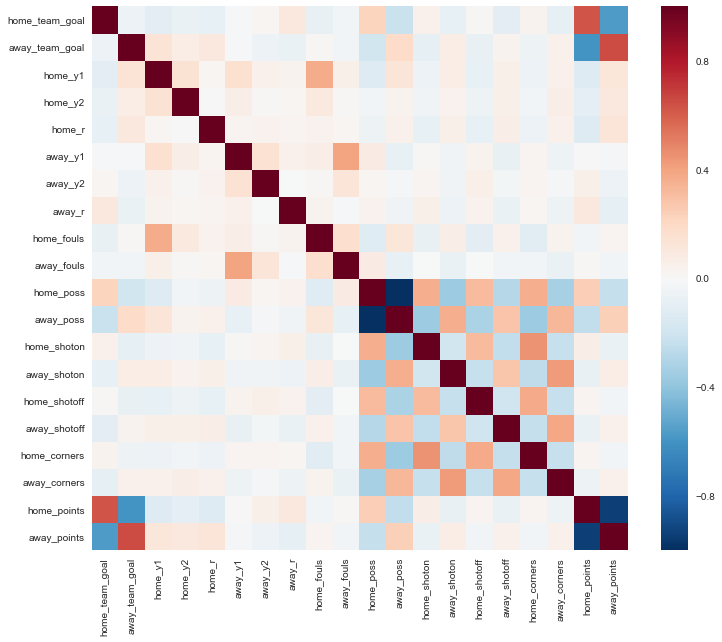

In [10]:
plt.figure(figsize = (12,10))
corr = df_noncategorical.corr()
sns.heatmap(corr)
plt.show()

We see (which may not be super surprising) that correlation generally exists between possession and goals as well as fouls and cards. Elaborate further on the correlations we see here.

### Comparing Home and Away Offensive Stats by Team

Comparing red cards at home and away games by team

In [11]:
df1 = df.groupby('home_team_name').\
    agg({'home_r': np.mean}).sort_values(by=[
        'home_r'], ascending = False)

In [12]:
df2 = df.groupby('away_team_name').\
    agg({'away_r': np.mean}).sort_values(by=[
        'away_r'], ascending = False)

In [13]:
result = df1.join(df2, lsuffix='home_r', rsuffix='away_r')
result.sort_values(by=['home_r','away_r'], ascending = False).head(10)

,home_r,away_r
home_team_name,,
Hull City,0.106667,0.052632
Watford,0.105263,0.000000
Queens Park Rangers,0.070175,0.087719
Bolton Wanderers,0.065789,0.052632
Southampton,0.065789,0.026316
Newcastle United,0.060150,0.097744
Portsmouth,0.054054,0.000000
Everton,0.052632,0.026316
Leicester City,0.052632,0.026316


Comparing yellow cards at home and away games by team

In [14]:
df1 = df.groupby('home_team_name').\
    agg({'home_points': np.sum})
    
df2 = df.groupby('away_team_name').\
    agg({'away_points': np.sum})

result = df1.join(df2, lsuffix='home_points', rsuffix='away_points')
result.sort_values(by=['home_points','away_points'], ascending = False).head(10) 

,home_points,away_points
home_team_name,,
Manchester United,364,269
Manchester City,357,229
Chelsea,337,258
Arsenal,325,255
Liverpool,301,225
Tottenham Hotspur,300,227
Everton,271,192
Stoke City,250,130
West Ham United,197,117


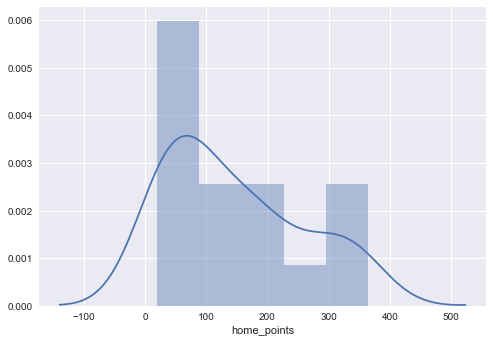

In [15]:
sns.distplot(result['home_points'])
plt.show()

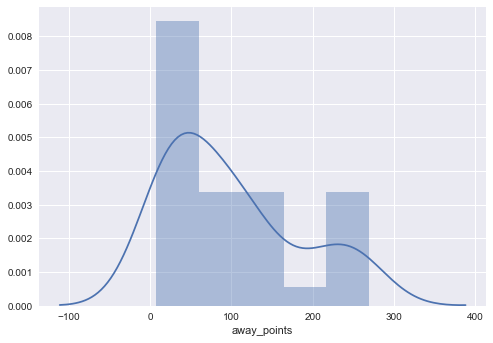

In [16]:
sns.distplot(result['away_points'])
plt.show()

In [17]:
df1 = df.groupby('home_team_name').\
    agg({'home_y2': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_y2': np.mean})

result = df1.join(df2, lsuffix='home_y2', rsuffix='away_y2')
result.sort_values(by=['home_y2','away_y2'], ascending = False).head(10)    

,home_y2,away_y2
home_team_name,,
Portsmouth,0.108108,0.078947
Queens Park Rangers,0.087719,0.017544
Middlesbrough,0.055556,0.000000
Crystal Palace,0.052632,0.035088
Birmingham City,0.052632,0.000000
Bolton Wanderers,0.039474,0.052632
Wolverhampton Wanderers,0.035088,0.052632
Sunderland,0.032895,0.065789
Manchester City,0.032895,0.039474


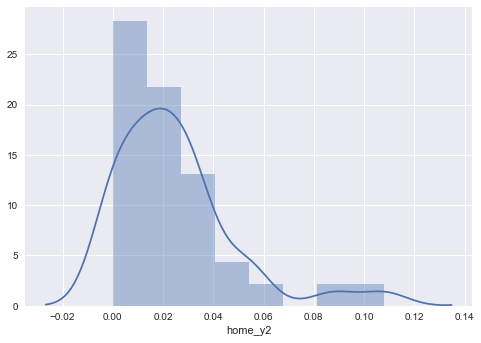

In [18]:
sns.distplot(result['home_y2'])
plt.show()

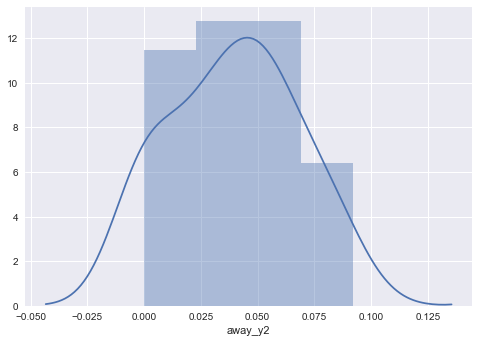

In [19]:
sns.distplot(result['away_y2'])
plt.show()

In [20]:
df1 = df.groupby('home_team_name').\
    agg({'home_y1': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_y1': np.mean})

result = df1.join(df2, lsuffix='home_y1', rsuffix='away_y1')
result.sort_values(by=['home_y1','away_y1'], ascending = False).head(10)    

,home_y1,away_y1
home_team_name,,
Watford,2.000000,1.947368
Sunderland,1.756579,1.927632
Portsmouth,1.729730,1.684211
Stoke City,1.644737,1.986842
Middlesbrough,1.611111,1.277778
Newcastle United,1.609023,1.857143
Birmingham City,1.578947,1.815789
Blackburn Rovers,1.573333,1.868421
Queens Park Rangers,1.543860,1.824561


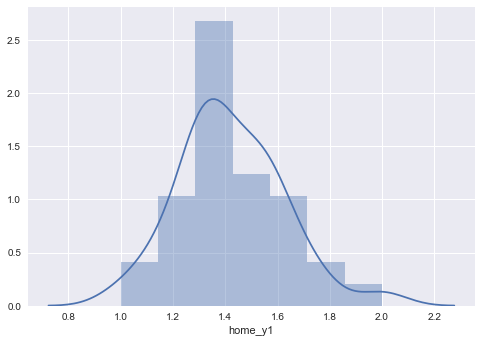

In [21]:
sns.distplot(result['home_y1'])
plt.show()

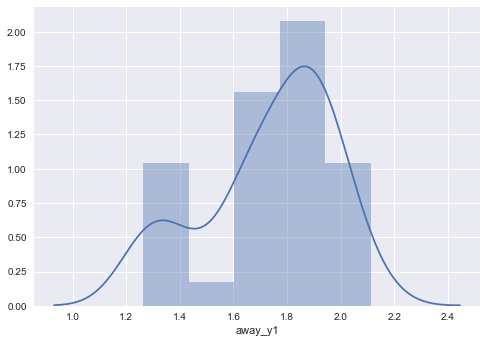

In [22]:
sns.distplot(result['away_y1'])
plt.show()

Comparing fouls at home and away games by team

Comparing avg. # of possessions at home and away games by team

In [23]:
df1 = df.groupby('home_team_name').\
    agg({'home_poss': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_poss': np.mean})

result = df1.join(df2, lsuffix='home_poss', rsuffix='away_poss')
result.sort_values(by=['home_poss','away_poss'], ascending = False).head(10)   

,home_poss,away_poss
home_team_name,,
Manchester United,58.920058,55.066907
Arsenal,58.027091,54.044714
Manchester City,56.988330,53.433114
Chelsea,56.635197,53.601088
Swansea City,56.628602,51.251404
Tottenham Hotspur,56.293860,52.893075
Liverpool,56.019093,52.551056
Everton,54.495054,50.948330
Southampton,54.125319,51.907769


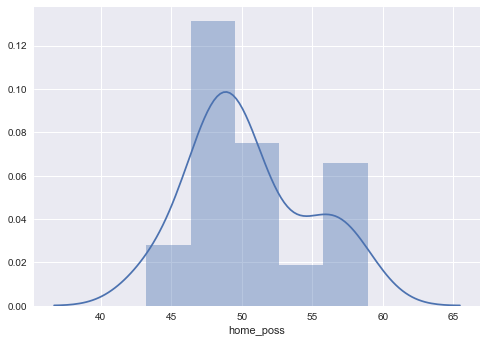

In [24]:
sns.distplot(result['home_poss'])
plt.show()

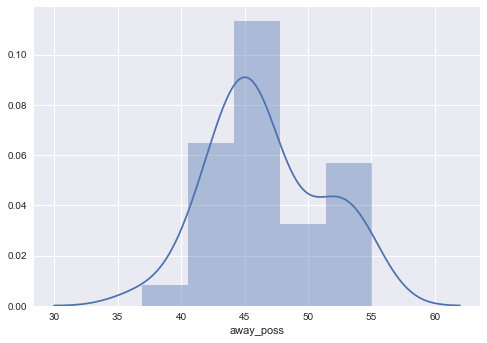

In [25]:
sns.distplot(result['away_poss'])
plt.show()

Comparing avg. # of goals at home and away games by team

In [26]:
df1 = df.groupby('home_team_name').\
    agg({'home_team_goal': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_team_goal': np.mean})

result = df1.join(df2, lsuffix='home_team_goal', rsuffix='away_team_goal')
result.sort_values(by=['home_team_goal','away_team_goal'], ascending = False).head(10)

,home_team_goal,away_team_goal
home_team_name,,
Manchester City,2.401316,1.585526
Manchester United,2.223684,1.605263
Chelsea,2.190789,1.635762
Arsenal,2.013158,1.741722
Liverpool,1.934211,1.559211
Southampton,1.763158,1.078947
Everton,1.697368,1.190789
Tottenham Hotspur,1.677632,1.486842
Leicester City,1.657895,1.342105


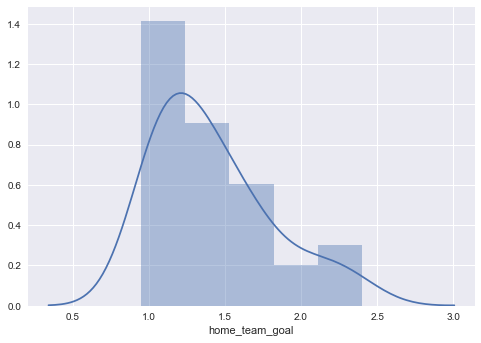

In [27]:
sns.distplot(result['home_team_goal'])
plt.show()

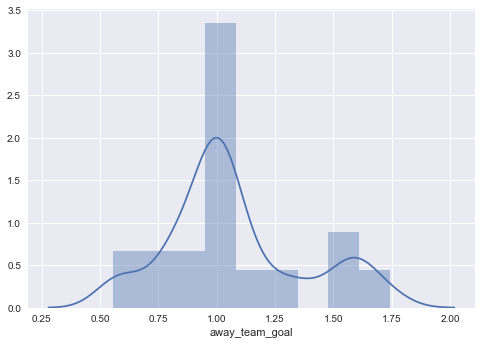

In [28]:
sns.distplot(result['away_team_goal'])
plt.show()

Comparing avg. # of fouls at home and away games by team

In [29]:
df1 = df.groupby('home_team_name').\
    agg({'home_fouls': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_fouls': np.mean})

result = df1.join(df2, lsuffix='home_fouls', rsuffix='away_fouls')
result.sort_values(by=['home_fouls','away_fouls'], ascending = False).head(10)   

,home_fouls,away_fouls
home_team_name,,
Hull City,12.600000,12.578947
Bolton Wanderers,12.500000,12.657895
Blackburn Rovers,12.240000,12.394737
Crystal Palace,11.842105,12.298246
Wigan Athletic,11.494737,11.905263
Stoke City,11.407895,12.375000
Middlesbrough,11.277778,11.888889
Blackpool,11.157895,9.842105
Portsmouth,11.081081,12.894737


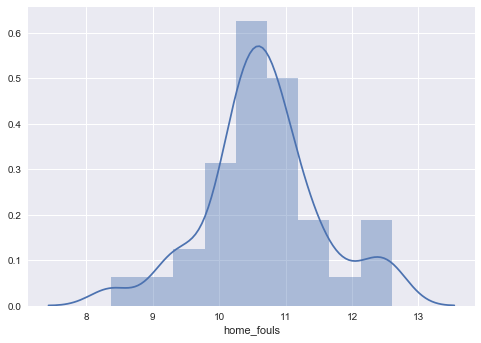

In [30]:
sns.distplot(result['home_fouls'])
plt.show()

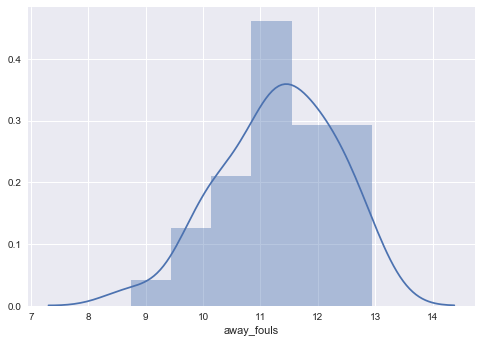

In [31]:
sns.distplot(result['away_fouls'])
plt.show()

In [32]:
df1 = df.groupby('home_team_name').\
    agg({'home_shoton': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_shoton': np.mean})

result = df1.join(df2, lsuffix='home_shoton', rsuffix='away_shoton')
result.sort_values(by=['home_shoton','away_shoton'], ascending = False).head(5)   

,home_shoton,away_shoton
home_team_name,,
Chelsea,8.848684,6.973510
Tottenham Hotspur,8.750000,6.519737
Liverpool,8.723684,6.618421
Arsenal,8.309211,6.523179
Manchester City,7.703947,6.644737


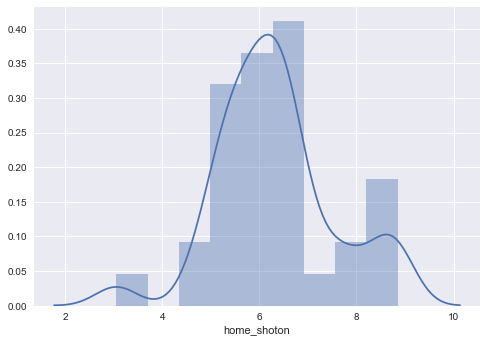

In [33]:
sns.distplot(result['home_shoton'])
plt.show()

In [34]:
df1 = df.groupby('home_team_name').\
    agg({'home_shotoff': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_shotoff': np.mean})

result = df1.join(df2, lsuffix='home_shotoff', rsuffix='away_shotoff')
result.sort_values(by=['home_shotoff','away_shotoff'], ascending = False).head(5)   

,home_shotoff,away_shotoff
home_team_name,,
Chelsea,8.506579,6.649007
Liverpool,8.460526,5.960526
Tottenham Hotspur,7.697368,5.914474
Arsenal,7.381579,5.642384
Manchester United,7.342105,5.677632


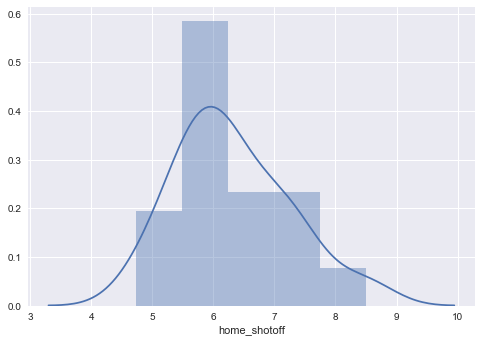

In [35]:
sns.distplot(result['home_shotoff'])
plt.show()

In [36]:
df1 = df.groupby('home_team_name').\
    agg({'home_corners': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_corners': np.mean})

result = df1.join(df2, lsuffix='home_corners', rsuffix='away_corners')
result.sort_values(by=['home_corners','away_corners'], ascending = False).head(5)   

,home_corners,away_corners
home_team_name,,
Manchester City,7.671053,5.565789
Liverpool,7.539474,5.743421
Arsenal,7.434211,5.536424
Tottenham Hotspur,7.144737,5.730263
Manchester United,6.960526,5.809211


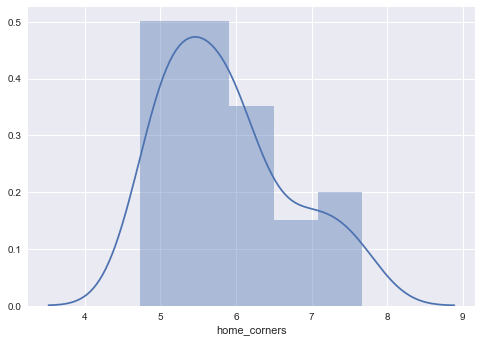

In [37]:
sns.distplot(result['home_corners'])
plt.show()

#### Seeing if fouls correlate with goals

In [38]:
df1 = df.groupby('home_team_name').\
    agg({'home_fouls': np.mean, 'home_team_goal': np.mean, 'home_y1': np.mean})
df2 = df.groupby('away_team_name').\
agg({'away_fouls': np.mean, 'away_team_goal': np.mean, 'away_y1': np.mean})

df_sub = df1.join(df2, how = 'inner')
df_sub.sort_values(by = ['home_fouls'], ascending = False).head(5)


,home_fouls,home_team_goal,home_y1,away_fouls,away_team_goal,away_y1
home_team_name,,,,,,
Hull City,12.600000,1.053333,1.426667,12.578947,0.855263,2.000000
Bolton Wanderers,12.500000,1.368421,1.394737,12.657895,1.013158,1.881579
Blackburn Rovers,12.240000,1.306667,1.573333,12.394737,1.013158,1.868421
Crystal Palace,11.842105,1.017544,1.491228,12.298246,1.070175,1.771930
Wigan Athletic,11.494737,1.115789,1.494737,11.905263,0.989474,1.936842


In [39]:
df_sub.sort_values(by = ['home_fouls'], ascending = False).tail(5)

,home_fouls,home_team_goal,home_y1,away_fouls,away_team_goal,away_y1
home_team_name,,,,,,
Birmingham City,9.789474,1.000000,1.578947,10.210526,0.973684,1.815789
Reading,9.473684,1.210526,1.105263,10.315789,1.052632,1.263158
Swansea City,9.347368,1.421053,1.421053,9.915789,1.031579,1.389474
Bournemouth,9.157895,1.210526,1.315789,9.789474,1.157895,1.473684
Cardiff City,8.368421,1.052632,1.315789,8.736842,0.631579,1.263158


#### Not that much correlation between fouling and goal scoring. There's a general negative correlation.

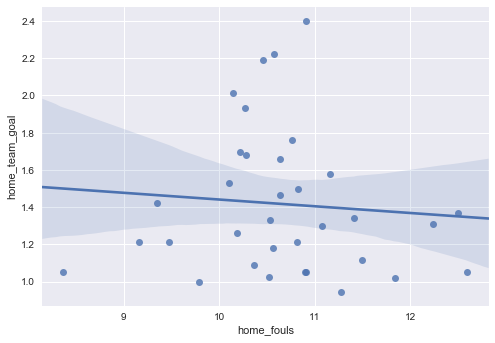

In [40]:
sns.regplot(df_sub['home_fouls'], y = df_sub['home_team_goal'])
plt.show()

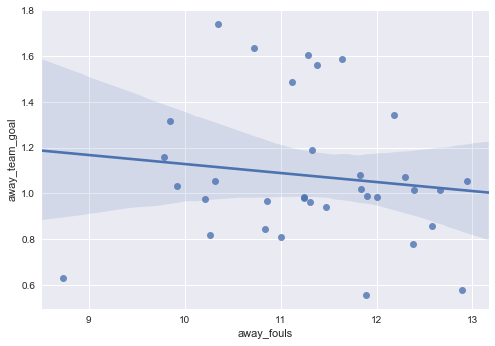

In [41]:
sns.regplot(df_sub['away_fouls'], y = df_sub['away_team_goal'])
plt.show()

#### Correlating yellow cards with fouls. There is a positive correlation.

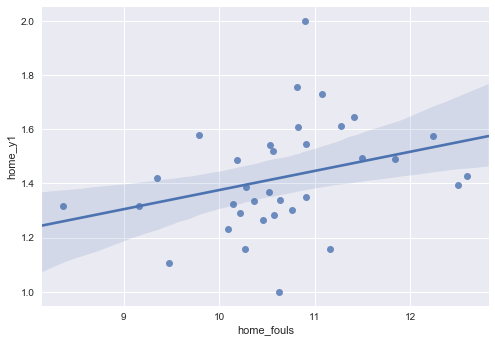

In [42]:
sns.regplot(df_sub['home_fouls'], y = df_sub['home_y1'])
plt.show()

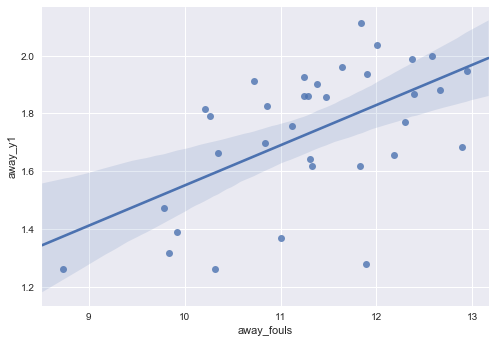

In [43]:
sns.regplot(df_sub['away_fouls'], y = df_sub['away_y1'])
plt.show()

#### Seeing who wins at home and who wins away

In [44]:
home_winners = df[df['home_team_goal'] > df['away_team_goal']]
home_winners.groupby('home_team_name').agg(
    {'home_team_goal': np.mean, 'away_team_goal': np.mean}).sort_values(by=[
        "home_team_goal"], ascending = False).head(5)

,home_team_goal,away_team_goal
home_team_name,,
Manchester City,2.902655,0.513274
Southampton,2.805556,0.444444
Chelsea,2.732673,0.445545
Liverpool,2.720930,0.476744
Arsenal,2.701031,0.474227


In [45]:
away_winners = df[df['home_team_goal'] < df['away_team_goal']]
away_winners.groupby('away_team_name').agg(
    {'away_team_goal': np.mean, 'home_team_goal': np.mean}).sort_values(by=[
        "away_team_goal"], ascending = False).head(5)

,away_team_goal,home_team_goal
away_team_name,,
Reading,3.000000,1.500000
Liverpool,2.765625,0.718750
Manchester City,2.741935,0.677419
Chelsea,2.648649,0.621622
Bolton Wanderers,2.625000,1.062500


**Creating a Target variable**

In [54]:
df1 = df.groupby('home_team_name').\
    agg({'home_team_goal': np.mean})
    
df2 = df.groupby('away_team_name').\
    agg({'away_team_goal': np.mean})

target_result = df1.join(df2, how='inner', lsuffix='home_team_goal', rsuffix='away_team_goal')

total_goals_avg = (target_result['home_team_goal'] + target_result['away_team_goal']) / 2
target_result['avg_total_goals_scored'] = total_goals_avg

target_result['avg_goals_conceded_home'] = df[['home_team_name','away_team_goal']].\
groupby('home_team_name').\
agg({'away_team_goal': np.mean})['away_team_goal']

target_result['avg_goals_conceded_away'] = df[['away_team_name','home_team_goal']].\
groupby('away_team_name').\
agg({'home_team_goal': np.mean})['home_team_goal']

target_result['avg_total_goals_conceded'] = (target_result['avg_goals_conceded_home'] + target_result['avg_goals_conceded_away'])/2

target_result['target_variable'] = target_result['avg_total_goals_scored']/target_result['avg_total_goals_conceded']

target_result.sort_values(by=['target_variable'], ascending = False).head(5)

,home_team_goal,away_team_goal,avg_total_goals_scored,avg_goals_conceded_home,avg_goals_conceded_away,avg_total_goals_conceded,target_variable
home_team_name,,,,,,,
Manchester United,2.223684,1.605263,1.914474,0.789474,1.052632,0.921053,2.078571
Chelsea,2.190789,1.635762,1.913276,0.848684,1.039735,0.944210,2.026325
Manchester City,2.401316,1.585526,1.993421,0.822368,1.197368,1.009868,1.973941
Arsenal,2.013158,1.741722,1.877440,0.802632,1.311258,1.056945,1.776289
Liverpool,1.934211,1.559211,1.746711,0.881579,1.335526,1.108553,1.575668


In [55]:
#avg goals conceded away
df[['away_team_name','home_team_goal']].\
groupby('away_team_name').\
agg({'home_team_goal': np.mean}).\
sort_values(by=['home_team_goal'], ascending = False).head(3)

,home_team_goal
away_team_name,
Burnley,2.210526
Blackpool,2.157895
Queens Park Rangers,2.140351


In [56]:
#avg goals conceded at home
df[['home_team_name','away_team_goal']].\
groupby('home_team_name').\
agg({'away_team_goal': np.mean}).\
sort_values(by=['away_team_goal'], ascending = False).head(3)

,away_team_goal
home_team_name,
Blackpool,1.947368
Cardiff City,1.842105
Bournemouth,1.789474


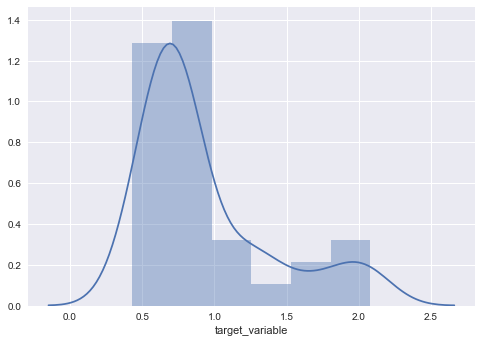

In [57]:
sns.distplot(target_result['target_variable'])
plt.show()

### Aggregate by team and calculate average for variables across the 8 seasons

In [58]:
df1 = df.groupby(['home_team_name', 'season']).\
    agg({'home_team_goal': np.mean})
df1.index.names = ['team name', 'season']
df1.head(10)    

home_team_goal
team name   season                   
Arsenal     2008/2009        1.631579
            2009/2010        2.526316
            2010/2011        1.736842
            2011/2012        2.052632
            2012/2013        2.473684
            2013/2014        1.894737
            2014/2015        2.157895
            2015/2016        1.631579
Aston Villa 2008/2009        1.421053
            2009/2010        1.526316

In [59]:
df2 = df.groupby(['away_team_name', 'season']).\
     agg({'away_team_goal': np.mean})
df2.index.names = ['team name', 'season']
df2.head(10)

away_team_goal
team name   season                   
Arsenal     2008/2009        1.833333
            2009/2010        1.842105
            2010/2011        2.052632
            2011/2012        1.842105
            2012/2013        1.315789
            2013/2014        1.684211
            2014/2015        1.578947
            2015/2016        1.789474
Aston Villa 2008/2009        1.421053
            2009/2010        1.166667

In [60]:
df2_flat = df2.reset_index()
df1_flat = df1.reset_index()

In [61]:
new_df = df1_flat.join(df2_flat, how = 'inner', lsuffix='_home', rsuffix='_away')
new_df.head(14)

,team name_home,season_home,home_team_goal,team name_away,season_away,away_team_goal
0,Arsenal,2008/2009,1.631579,Arsenal,2008/2009,1.833333
1,Arsenal,2009/2010,2.526316,Arsenal,2009/2010,1.842105
2,Arsenal,2010/2011,1.736842,Arsenal,2010/2011,2.052632
3,Arsenal,2011/2012,2.052632,Arsenal,2011/2012,1.842105
4,Arsenal,2012/2013,2.473684,Arsenal,2012/2013,1.315789
5,Arsenal,2013/2014,1.894737,Arsenal,2013/2014,1.684211
6,Arsenal,2014/2015,2.157895,Arsenal,2014/2015,1.578947
7,Arsenal,2015/2016,1.631579,Arsenal,2015/2016,1.789474
8,Aston Villa,2008/2009,1.421053,Aston Villa,2008/2009,1.421053
9,Aston Villa,2009/2010,1.526316,Aston Villa,2009/2010,1.166667


In [62]:
np.all(new_df['team name_home'] == new_df['team name_away'])

True

In [63]:
np.all(new_df['season_home'] == new_df['season_away'])

True

In [64]:
season_goals_df = new_df.drop(['team name_away', 'season_away'], axis = 1)
season_goals_df['avg_total_goals'] = (season_goals_df['home_team_goal'] + season_goals_df['away_team_goal'])/2
season_goals_df.head()

,team name_home,season_home,home_team_goal,away_team_goal,avg_total_goals
0,Arsenal,2008/2009,1.631579,1.833333,1.732456
1,Arsenal,2009/2010,2.526316,1.842105,2.184211
2,Arsenal,2010/2011,1.736842,2.052632,1.894737
3,Arsenal,2011/2012,2.052632,1.842105,1.947368
4,Arsenal,2012/2013,2.473684,1.315789,1.894737


In [65]:
df.columns

Index(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name',
       'home_y1', 'home_y2', 'home_r', 'away_y1', 'away_y2', 'away_r',
       'home_fouls', 'away_fouls', 'home_poss', 'away_poss', 'home_shoton',
       'away_shoton', 'home_shotoff', 'away_shotoff', 'home_corners',
       'away_corners', 'home_points', 'away_points'],
      dtype='object')

In [66]:
season_goals_df.to_csv('season_goals.csv')

In [67]:
home_stats_df = df.groupby(['home_team_name', 'season']).\
    agg({'home_team_goal': np.mean,
        'home_points': np.mean,
        'home_y1': np.mean,
        'home_y2': np.mean,
        'home_shoton': np.mean,
        'home_shotoff' : np.mean,
        'home_poss': np.mean,
        'home_fouls': np.mean,
        'home_corners' : np.mean,
        'home_r': np.mean})
home_stats_df.names = ['team name', 'season']

away_stats_df = df.groupby(['away_team_name', 'season']).\
     agg({'away_team_goal': np.mean,
         'away_points' : np.mean,
         'away_y1': np.mean,
         'away_y2': np.mean,
         'away_shoton': np.mean,
         'away_shotoff' : np.mean,
         'away_poss': np.mean,
         'away_fouls': np.mean,
         'away_corners' : np.mean,
         'away_r': np.mean})
away_stats_df.index.names = ['team name', 'season']

home_stats_df_flat = home_stats_df.reset_index()
away_stats_df_flat = away_stats_df.reset_index()

combined_df = home_stats_df_flat.join(away_stats_df_flat, how = 'inner', lsuffix='_home', rsuffix='_away')
combined_df.head()

,home_team_name,season_home,home_team_goal,home_points,home_y1,home_y2,home_shoton,home_shotoff,home_poss,home_fouls,home_corners,home_r,team name,season_away,away_team_goal,away_points,away_y1,away_y2,away_shoton,away_shotoff,away_poss,away_fouls,away_corners,away_r
0,Arsenal,2008/2009,1.631579,2.000000,1.315789,0.052632,8.263158,8.578947,57.495614,11.105263,8.000000,0.000000,Arsenal,2008/2009,1.833333,1.722222,1.888889,0.055556,5.388889,6.944444,52.907407,12.722222,6.055556,0.055556
1,Arsenal,2009/2010,2.526316,2.473684,1.210526,0.000000,8.263158,7.105263,57.931579,10.526316,6.631579,0.052632,Arsenal,2009/2010,1.842105,1.473684,1.578947,0.000000,6.526316,6.105263,53.697368,11.894737,6.631579,0.000000
2,Arsenal,2010/2011,1.736842,1.947368,1.631579,0.000000,9.894737,7.526316,56.823684,11.526316,7.263158,0.157895,Arsenal,2010/2011,2.052632,1.631579,1.947368,0.105263,6.789474,6.473684,52.878947,10.894737,5.894737,0.052632
3,Arsenal,2011/2012,2.052632,2.105263,1.789474,0.052632,7.631579,8.315789,56.982456,10.421053,8.210526,0.000000,Arsenal,2011/2012,1.842105,1.578947,1.578947,0.105263,7.263158,5.789474,53.511404,10.473684,5.421053,0.052632
4,Arsenal,2012/2013,2.473684,2.000000,1.052632,0.000000,7.842105,7.736842,54.310526,9.578947,7.526316,0.052632,Arsenal,2012/2013,1.315789,1.842105,1.263158,0.105263,6.157895,5.894737,54.741228,8.578947,5.789474,0.105263


In [68]:
combined_df.head().columns
combined_season_stats_df = combined_df.drop(['team name', 'season_away'], axis = 1)
combined_season_stats_df['avg_total_goals'] = season_goals_df['avg_total_goals']
combined_season_stats_df.head()

,home_team_name,season_home,home_team_goal,home_points,home_y1,home_y2,home_shoton,home_shotoff,home_poss,home_fouls,home_corners,home_r,away_team_goal,away_points,away_y1,away_y2,away_shoton,away_shotoff,away_poss,away_fouls,away_corners,away_r,avg_total_goals
0,Arsenal,2008/2009,1.631579,2.000000,1.315789,0.052632,8.263158,8.578947,57.495614,11.105263,8.000000,0.000000,1.833333,1.722222,1.888889,0.055556,5.388889,6.944444,52.907407,12.722222,6.055556,0.055556,1.732456
1,Arsenal,2009/2010,2.526316,2.473684,1.210526,0.000000,8.263158,7.105263,57.931579,10.526316,6.631579,0.052632,1.842105,1.473684,1.578947,0.000000,6.526316,6.105263,53.697368,11.894737,6.631579,0.000000,2.184211
2,Arsenal,2010/2011,1.736842,1.947368,1.631579,0.000000,9.894737,7.526316,56.823684,11.526316,7.263158,0.157895,2.052632,1.631579,1.947368,0.105263,6.789474,6.473684,52.878947,10.894737,5.894737,0.052632,1.894737
3,Arsenal,2011/2012,2.052632,2.105263,1.789474,0.052632,7.631579,8.315789,56.982456,10.421053,8.210526,0.000000,1.842105,1.578947,1.578947,0.105263,7.263158,5.789474,53.511404,10.473684,5.421053,0.052632,1.947368
4,Arsenal,2012/2013,2.473684,2.000000,1.052632,0.000000,7.842105,7.736842,54.310526,9.578947,7.526316,0.052632,1.315789,1.842105,1.263158,0.105263,6.157895,5.894737,54.741228,8.578947,5.789474,0.105263,1.894737


In [69]:
combined_season_stats_df.to_csv('combined_season_stats.csv')

In [70]:
df1 = df.groupby(['home_team_name', 'season']).\
    agg({'home_team_goal': np.mean})
    
df2 = df.groupby(['away_team_name', 'season']).\
    agg({'away_team_goal': np.mean})

df1_new = df1.reset_index()
df2_new = df2.reset_index()


target_result_new = df1_new.join(df2_new, how='inner', lsuffix='_home_team_goal', rsuffix='_away_team_goal')

target_result_new.head()
trimmed_df = target_result_new.drop(['away_team_name','season_away_team_goal'], axis = 1)
trimmed_df.head()

total_goals_avg = (trimmed_df['home_team_goal'] + trimmed_df['away_team_goal']) / 2
trimmed_df['avg_total_goals_scored'] = total_goals_avg


In [71]:
trimmed_df['avg_goals_conceded_home'] = df[['home_team_name','away_team_goal', 'season']].\
groupby(['home_team_name', 'season']).\
agg({'away_team_goal': np.mean})['away_team_goal'].values


trimmed_df['avg_goals_conceded_away'] = df[['away_team_name','home_team_goal', 'season']].\
groupby(['away_team_name', 'season']).\
agg({'home_team_goal': np.mean})['home_team_goal'].values

trimmed_df.head()

trimmed_df['avg_total_goals_conceded'] = (trimmed_df['avg_goals_conceded_home'] + 
                                          trimmed_df['avg_goals_conceded_away'])/ 2

trimmed_df['target_variable'] = trimmed_df['avg_total_goals_scored']/trimmed_df['avg_total_goals_conceded']

trimmed_df.head()

,home_team_name,season_home_team_goal,home_team_goal,away_team_goal,avg_total_goals_scored,avg_goals_conceded_home,avg_goals_conceded_away,avg_total_goals_conceded,target_variable
0,Arsenal,2008/2009,1.631579,1.833333,1.732456,0.842105,1.166667,1.004386,1.724891
1,Arsenal,2009/2010,2.526316,1.842105,2.184211,0.789474,1.368421,1.078947,2.024390
2,Arsenal,2010/2011,1.736842,2.052632,1.894737,0.789474,1.473684,1.131579,1.674419
3,Arsenal,2011/2012,2.052632,1.842105,1.947368,0.894737,1.684211,1.289474,1.510204
4,Arsenal,2012/2013,2.473684,1.315789,1.894737,1.210526,0.736842,0.973684,1.945946


In [72]:
trimmed_df.to_csv('target_var_season_stats.csv')


In [74]:
trimmed_df.shape

(160, 9)

In [75]:
combined_season_stats_df.shape

(160, 23)

In [81]:
trimmed_df_clean = trimmed_df.drop(['home_team_name', 'season_home_team_goal', 
                                    'home_team_goal', 'away_team_goal', 'avg_total_goals_scored'], axis = 1)

In [82]:
grand_total_df = pd.concat([combined_season_stats_df, trimmed_df_clean], axis=1)
grand_total_df.head()

,home_team_name,season_home,home_team_goal,home_points,home_y1,home_y2,home_shoton,home_shotoff,home_poss,home_fouls,home_corners,home_r,away_team_goal,away_points,away_y1,away_y2,away_shoton,away_shotoff,away_poss,away_fouls,away_corners,away_r,avg_total_goals,avg_goals_conceded_home,avg_goals_conceded_away,avg_total_goals_conceded,target_variable
0,Arsenal,2008/2009,1.631579,2.000000,1.315789,0.052632,8.263158,8.578947,57.495614,11.105263,8.000000,0.000000,1.833333,1.722222,1.888889,0.055556,5.388889,6.944444,52.907407,12.722222,6.055556,0.055556,1.732456,0.842105,1.166667,1.004386,1.724891
1,Arsenal,2009/2010,2.526316,2.473684,1.210526,0.000000,8.263158,7.105263,57.931579,10.526316,6.631579,0.052632,1.842105,1.473684,1.578947,0.000000,6.526316,6.105263,53.697368,11.894737,6.631579,0.000000,2.184211,0.789474,1.368421,1.078947,2.024390
2,Arsenal,2010/2011,1.736842,1.947368,1.631579,0.000000,9.894737,7.526316,56.823684,11.526316,7.263158,0.157895,2.052632,1.631579,1.947368,0.105263,6.789474,6.473684,52.878947,10.894737,5.894737,0.052632,1.894737,0.789474,1.473684,1.131579,1.674419
3,Arsenal,2011/2012,2.052632,2.105263,1.789474,0.052632,7.631579,8.315789,56.982456,10.421053,8.210526,0.000000,1.842105,1.578947,1.578947,0.105263,7.263158,5.789474,53.511404,10.473684,5.421053,0.052632,1.947368,0.894737,1.684211,1.289474,1.510204
4,Arsenal,2012/2013,2.473684,2.000000,1.052632,0.000000,7.842105,7.736842,54.310526,9.578947,7.526316,0.052632,1.315789,1.842105,1.263158,0.105263,6.157895,5.894737,54.741228,8.578947,5.789474,0.105263,1.894737,1.210526,0.736842,0.973684,1.945946


In [83]:
grand_total_df.to_csv('grand_total_df.csv')